<a href="https://colab.research.google.com/github/lexscher/data-management-1_final_project/blob/main/CST2312_DM1_Project_Alexander_schelchere.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Data Management I Final Project

## How can we better understand the homelessness crisis in New York City?

### As the population continues to grow, it becomes harder and harder to understand how we can help the growing community of unhoused people.

In [84]:
# import data files

# NYC Population Data
!curl "https://raw.githubusercontent.com/lexscher/data-management-1_final_project/main/NYC-population.csv" -o NYC-population.csv
!curl "https://raw.githubusercontent.com/lexscher/data-management-1_final_project/main/NYC-population-projected.csv" -o NYC-population-projected.csv

# DHS Census Data
!curl "https://raw.githubusercontent.com/lexscher/data-management-1_final_project/main/dhs_adult_family_census.csv" -o dhs_adult_family_census.csv
!curl "https://raw.githubusercontent.com/lexscher/data-management-1_final_project/main/dhs_families_with_children_census.csv" -o dhs_families_with_children_census.csv
!curl "https://raw.githubusercontent.com/lexscher/data-management-1_final_project/main/dhs_single_adult_shelter_census.csv" -o dhs_single_adult_shelter_census.csv


  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100   574  100   574    0     0   5683      0 --:--:-- --:--:-- --:--:--  5683
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100   370  100   370    0     0   2228      0 --:--:-- --:--:-- --:--:--  2228
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100   934  100   934    0     0   6577      0 --:--:-- --:--:-- --:--:--  6577
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  1039  100  1039    0     0  12670      0 --:--:-- --:--:-- --:--:-- 12670
  % Total    % Received % Xferd  Average Speed   Tim

In [85]:
# import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter
import seaborn as sns

In [86]:
# Make functions that we may use later

# Helpers to convert the values into millions
def millions(x, pos):
    'The two args are the value and tick position'
    return '%1.1f' % (x * 1e-6)

mil_formatter = FuncFormatter(millions)

# Draw the simple NYC population data into a chart
def draw_chart(plot_a, plot_b, title, xlabel, ylabel):
    plt.figure(figsize=(12,6))
    plt.plot(plot_a, plot_b)
    plt.title(title)
    plt.gca().yaxis.set_major_formatter(mil_formatter) 
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.show()


# Draw the DHS data into charts (takes way more work)
def draw_dhs_chart(df, title):
    months = df.columns[1:]
    fiscal_years = df['FiscalYear']

    plt.figure(figsize=(12,6))

    for i in range(len(fiscal_years)):
        plt.plot(months, df.loc[i, months], label=fiscal_years[i])

    plt.title(title)
    plt.xlabel('Months')
    plt.ylabel('Count')
    plt.legend(title='Fiscal Year', bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.show()


In [87]:
# Load the data
dhs_adult_family_census = pd.read_csv('dhs_adult_family_census.csv')
dhs_families_with_children_census = pd.read_csv('dhs_families_with_children_census.csv')
dhs_single_adult_shelter_census = pd.read_csv('dhs_single_adult_shelter_census.csv')
nyc_population = pd.read_csv('NYC-population.csv')
nyc_population_projected = pd.read_csv('NYC-population-projected.csv')

In [88]:
# Clean the data
dhs_adult_family_census.columns = dhs_adult_family_census.columns.str.strip()
dhs_families_with_children_census.columns = dhs_families_with_children_census.columns.str.strip()
dhs_single_adult_shelter_census.columns = dhs_single_adult_shelter_census.columns.str.strip()
nyc_population.columns = nyc_population.columns.str.strip()
nyc_population_projected.columns = nyc_population.columns.str.strip()

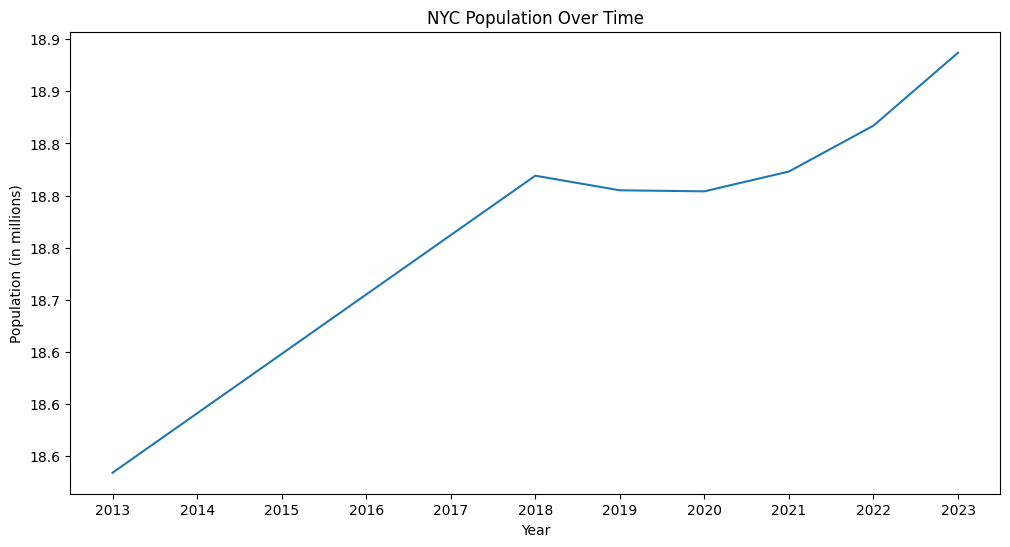

In [89]:
# plot data
subset_nyc_population = nyc_population[10:21]

draw_chart(
    subset_nyc_population['Date'].str.slice(0, 4), 
    subset_nyc_population['Population'],
    'NYC Population Over Time',
    'Year',
    'Population (in millions)'
    )

## Our population continues to increase over time, only wavering slightly around the time that COVID hit.

### By the **year 2023** New York City is **projected to hit a population of 20 million.**

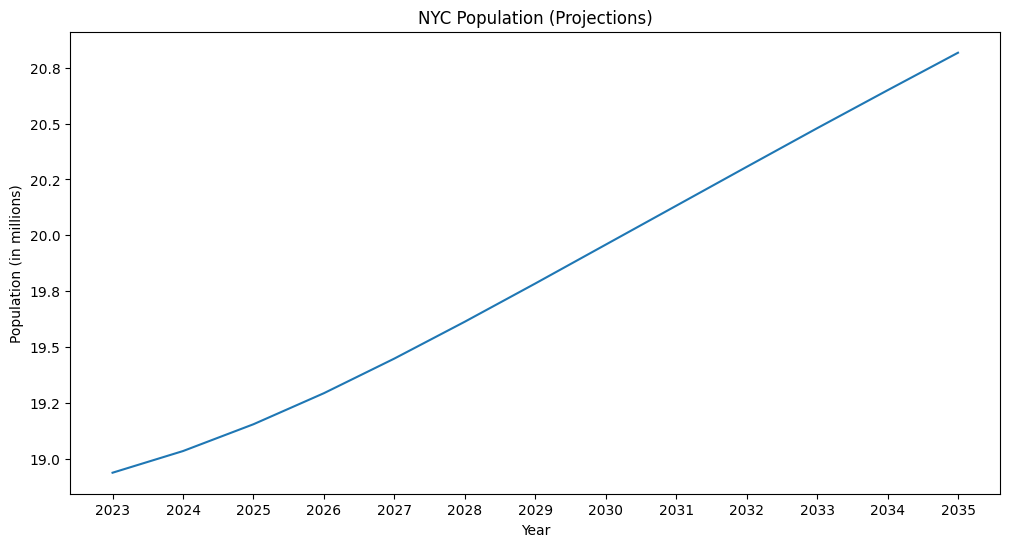

In [90]:
draw_chart(
    nyc_population_projected['Date'].str.slice(0, 4), 
    nyc_population_projected['Population'],
    'NYC Population (Projections)',
    'Year',
    'Population (in millions)'
)

### Looking at the data we get from the Department of Human Services, the number of unhoused people continues to grow with our population.

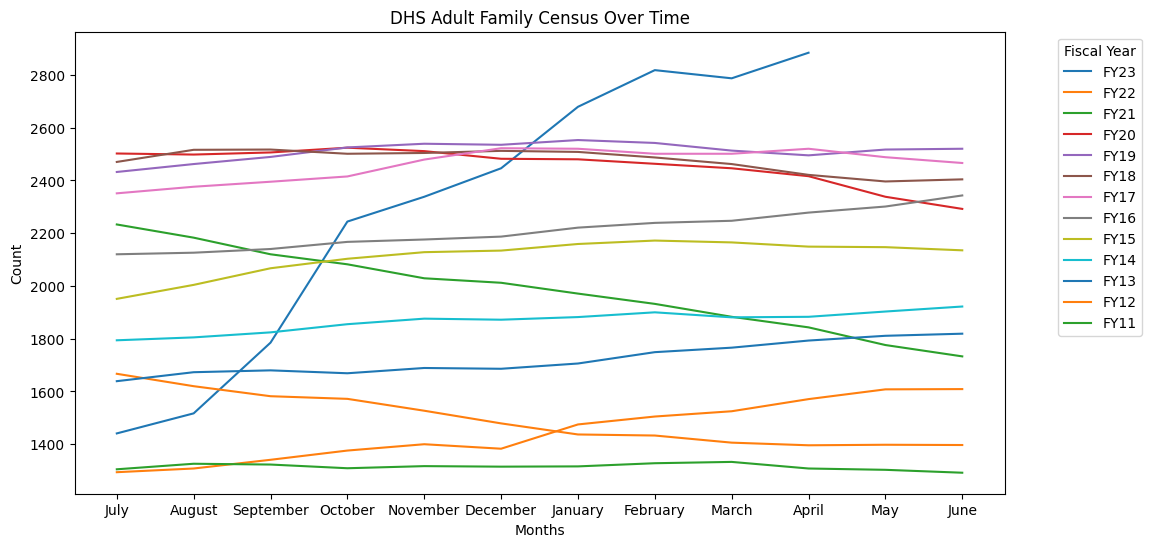

In [91]:
draw_dhs_chart(dhs_adult_family_census, 'DHS Adult Family Census Over Time')

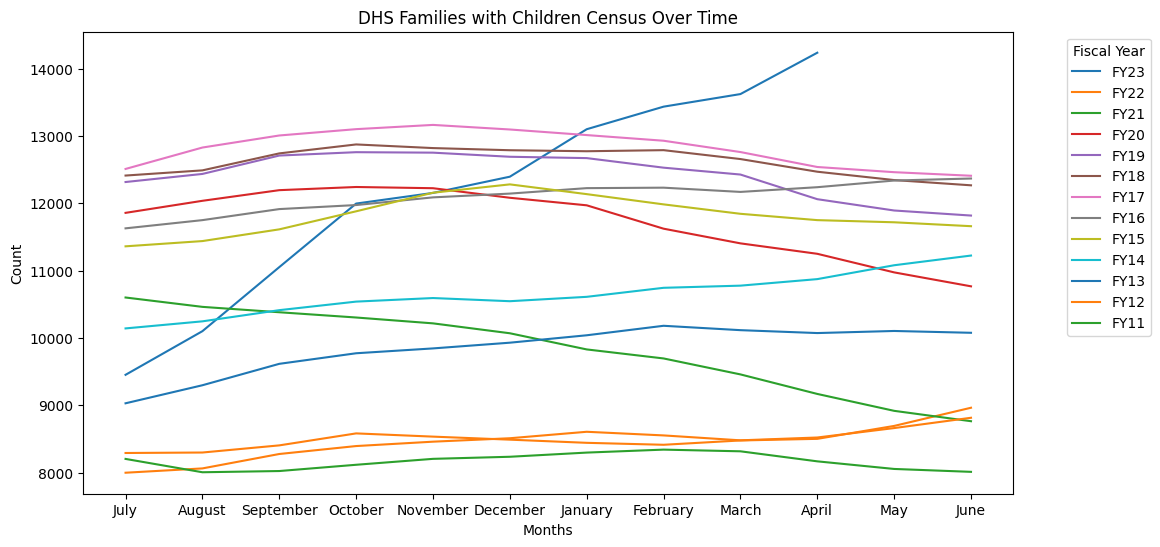

In [92]:
draw_dhs_chart(dhs_families_with_children_census, 'DHS Families with Children Census Over Time')

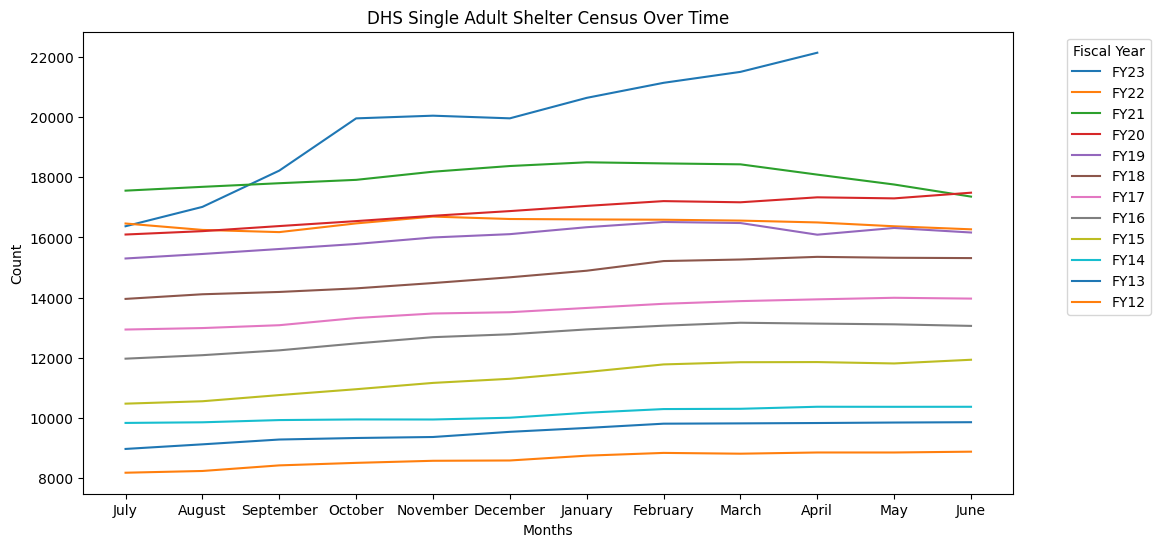

In [93]:
draw_dhs_chart(dhs_single_adult_shelter_census, 'DHS Single Adult Shelter Census Over Time')

## This most likely won't solve the housing issues, but we may be able to use some of the vacant rent-stabilized apartments.


![apartment-vacancies.png](https://raw.githubusercontent.com/lexscher/data-management-1_final_project/main/apartment-vacancies.png)


### With (at least) over 30,000 vacant and available apartments, we may be able to help a good portion of those who are unhoused get a roof over their heads.

Even though this is a small step, this could mean a lot to people who need help getting back on their feet.

Being unhoused can create so many barriers when it comes to job seeking.

- **Lack of Stable Address**: Many employers require a stable address for hiring. This means that being unhoused can limit job opportunities.

- **Access to Resources**: Being unhoused can make it difficult to access resources that aid in job searching. Luxuries we have everyday like internet access, a quiet place to fill out applications, or a place to prepare for and dress appropriately for interviews.

- **Health Issues**: Unhoused individuals often deal with health issues at higher rates than the general population, and these health issues can create barriers to consistent employment.

- **Logistical Challenges**: Without a stable place to live, logistical aspects of working, such as having a safe place to store belongings during work hours or having a consistent place to sleep and rest, can be challenging.

- **Stress and Mental Health**: The stress of being unhoused can impact mental health, making it harder to search for and maintain employment. The [Substance Abuse and Mental Health Services Administration](https://www.samhsa.gov/) shares that **around 30%** of unhoused people have **mental health conditions**, and **nearly 60%** struggle with **substance abuse**. 



# Providing housing for a portion of our unhoused population isn't the sole solution here, but I believe this can help some on their journey to finding a career and in turn improve their quality of life.

### Sources:


Data | Source | link 
---- | ----   | ----
NYC Population Data | Macrotrends Data | www.macrotrends.net
NYC Homeless Shelter Census Data | NYC Department of Human Services | https://www.nyc.gov/site/dhs/index.page
Apartment Vacancies | City Limits via the HRC | [City Limits Article](https://citylimits.org/2022/11/17/empty-rent-stabilized-units-in-nyc-decreased-this-year-as-warehousing-debate-rages/)
  ""    |  Homes and Community Renewal (HRC) | https://hcr.ny.gov/about-hcr
  -  | Substance Abuse and Mental Health Services Administration | [SAMHSA Facts Sheet](https://www.samhsa.gov/sites/default/files/programs_campaigns/homelessness_programs_resources/hrc-factsheet-current-statistics-prevalence-characteristics-homelessness.pdf)